<center>
<h1 style='text-align : justify; direction: rtl'><center>AI_CA3</center></h1>
<h2 style='text-align : justify; direction: rtl'><center>سید احسان حسن بیگی - 810197619</center></h2>


<h1 style='text-align : justify; direction: rtl'>
    خلاصه و اهداف:
</h1>
<p style='text-align : justify; direction: rtl'>
در این پروژه قصد آشنایی با classify کردن با روش ساده ی naive bayes را داریم.
در مسائل classify قصد داریم داده های ورودی مسئله مان را lable گذاری کرده و هر کدام آن ها را داخل یک class قرار دهیم.
  در این مسئله خاص قرار است تعدادی کتاب با توضیحات مربوط هر کدام را ورودی گرفته و کتاب ها را در دسته بندی های معین از پیش تعیین شده قرار دهیم.
    <br>
    برای این منظور یک فایل تحت عنوان books_train.csv در اختیار داریم که تعدادی کتاب با دسته بندی صحیح در آن قرار دارد. همان طور که از نام آن بر می آید این اطلاعات قرار است تا به ما یاد بدهد که چطور باید دسته بندی کنیم.
    <br>
    در نهایت نیز یک فایل تحت عنوان books_test.csv داریم که قرار است دسته بندی درست برای هر کتاب آن را تشخیص دهیم و با دسته بندی اعلام شده مقایسه کنیم. در صورت یکی بودن، تشخیص ما صحیح بوده و با بررسی تعداد تشخیص های صحیح میتوانیم عملکرد classifier خود را مورد سنجش قرار دهیم.
    <br>
    همان طور که گفته شد روش classify کردن ما naive bayes است. در این روش یک فرض اصلی داریم که کار محاسبات را بسیار ساده می کند. در این روش فرض این است که به شرط دانستن label احتمال تمامی feature ها از یکدیگر مستقل است.
    به این صورت می توان احتمال توئم feature ها را به صورت ضرب آن ها نوشت که کار را بسیار ساده تر می کند. البته واضحا این فرض همیشه صحیح نبوده و دقت کار را پایین می آورد اما مشاهده می شود که در برخی موارد همین میزان دقت هم عملکرد مناسبی را در پی دارد.
</p>

<h1 style='text-align : justify; direction: rtl'>
نحوه مدل کردن مسئله:
</h1>
<p style='text-align : justify; direction: rtl'>
در این مسئله از روش bag of words استفاده می کنیم.
    به این صورت که feature را تعداد هر کلمه در class مربوط به آن در نظر میگیریم و اهمیتی به جایگاه کلمه در جمله نمی دهیم(به این معنی که ترتیب کلمات مهم نیستند)
    بنابر این ساختار داده مان برای محاسبه 
    $p(f_i|Y_j)$
    به صورت زیر است که در ادامه به توضیحات بیشتر میپردازیم.
</p>

<center><img src="mat/features_count.png">featuresCount</center>

<h1 style='text-align : justify; direction: rtl'>
پیش پردازش داده:
</h1>
<h2 style='text-align : justify; direction: rtl'>
    Q1:
</h2>
<p style='text-align : justify; direction: rtl'>
در گام نخست باید داده هایی که در فایل های  csv داریم را پیش پردازش کنیم تا به فرمی مناسب برای پردازش های پیش رو تبدیل شود.
    مدل مطلوب ما در این مسئله آن است که برای هر کتاب <u>آرایه ای از کلماتی که در آن به کار رفته</u> و همچنین <u>دسته بندی صحیح آن</u> را داشته باشیم.
    همان طور که در تابع doPreprocessings عمل کرده ایم، در این قسمت ابتدا ستون نام کتاب را با ستون توضیحات آن merge کردیم تا تنها دو ستون توضیحات و دسته بندی صحیح برای هر کتاب باقی بماند.
    در ادامه با استفاده از کتابخانه ی هضم چهار عملیات زیر را بر روی data frame مان انجام دادیم که توضیحات هر یک به شرح زیر است:
<ul style='text-align : justify; direction: rtl'>
  <li>normalize:
      این فانکشن با قرار دادن نیم فاصله ها از در نظر گرفته شدن یکسری از کلمات مانند «ها» تحت عنوان یک توکن جدا جلوگیری میکند
  </li>
  <li>tokenize:
      این تابع قرار است یک string که توضیحات هر کتاب باشد، را گرفته و یک آرایه از توکن ها را برگرداند که تقریبا اصلی ترین کار مرحله پیش پردازش است
  </li>
  <li>stem:
      این تابع قرار است کلماتی مانند «ها» یا «ی نکره» یا ... را که به لطف normalize کنار کلمه اصلی خود ماندند را از توکن حذف کند تا کلماتی مانند «دفتر» و «دفتر ها» هر دو یک توکن یکسان در نظر گرفته شوند
  </li>
  <li>lemmatize:
      این تابع نیز رفتاری مشابه stem دارد و فعل ها را به بن آن فعل تبدیل می کند. به این صورت کلماتی مانند «رفت» و «می رود» هر دو یک توکن یکسان در نظر گرفته می شوند
  </li>
  <li>removeGarbage:
    جدای از توابع کتابخانه هضم، توسط این تابع یکسری از token ها که stop word محسوب می شدند یا بار معنایی خاصی نداشتند را حذف کردیم
  </li>
</ul>  

</p>

<h1 style='text-align : justify; direction: rtl'>
فرایند مسئله:
</h1>
<h2 style='text-align : justify; direction: rtl'>
Q2:
</h2>
<p style='text-align : justify; direction: rtl'>
برای ادامه کار نیاز است 
    $p(f|Y_j)$ یا همان likelihood
    را محاسبه کنیم و بنابراین نیاز است تا جدول featuresCount را که بالاتر تصویر آن را قرار دادیم به دست آوریم.
    این کار را توسط تابع train و با پیمایش داده های پیش پردازش شده انجام دادیم.
    <br>
    حال توسط فرمول
    $$P(posterior) = \frac{likelihood * P(prior)}{P(evidence)}$$
    می توان به مطلوب مسئله رسید. در ادامه به توضیح هر کدام از این چهار مورد می پردازیم:
    <ul style='text-align : justify; direction: rtl'>
  <li>P(posterior):
      همان مطلوب مسئله است(احتمال تعلق به یک class به شرط داشتن feature ها) 
  </li>
  <li>likelihood:
      این احتمال، برعکس مورد قبل است و بیان گر احتمال داشتن feature ها به شرط تعلق به یک class است.
      $P(f_i|Y_j)$
      را میتوان با گشتن برای تعداد هر feature موجود برای کتاب، در جدول featuresCount به دست آورد و با تقسیم بر تعداد کل به درصد آن رسید و با ضرب آن ها به likelihood می رسیم. یعنی: 
      $\displaystyle \prod_{i} \frac{count(f_i,Y_j)}{count(Y_j)}$
      <br>
      شایان ذکر است که با توجه به فرض naive bayes مبنی بر استقلال شرطی، این عبارت برابر است با ضرب احتمال وجود هر کلمه در آن دسته بندی که از روی جدول مذکور به دست می آید. ضمنا با توجه به اینکه ضرب این احتمال ها اعداد بسیار کوچکی می سازند، برای محاسبه از لگاریتم آن ها استفاده کرده ایم.
  </li>
  <li>P(prior):
      این احتمال برابر است با احتمال وقوع هر کلاس که با توجه به تعداد token ها مشخص می شود و برای هر کلاس برابر است با $\frac{count(Y_i)}{\Sigma count(Y_i)}$
  </li>
  <li>P(evidence):
      این مورد احتمال توئم وجود تمام feature هاست که برای آن باید از فرمول مربوط به احتمال کل استفاده کرد.
      با توجه به یکسان بودن مخرج برای تمام class ها این قسمت تاثیری در مقایسه بین P(posterior) نداشته و بنابراین از محاسبه آن پرهیز کردیم.
  </li>
</ul>  
    
</p>

<h1 style='text-align : justify; direction: rtl'>
bigram:
</h1>
<h2 style='text-align : justify; direction: rtl'>
Q3:
</h2>
<p style='text-align : justify; direction: rtl'>
    نقد وارد شده به مدل bag of wordsی که پیاده سازی کردیم این است که برای هر کلمه به context جمله اهمیتی ندادیم و این مورد ممکن است در مواردی باعث شود کلماتی که در بافت های متفاوتی قرار دارند، یکی در نظر گرفته شده و دقت کار را پایین بیاورند.
برای مثال دو جمله زیر هر دو دارای کلمه «چرخ» هستند و واضحا معنی های متفاوتی دارند، اما مدل ما آن ها را یک چیز در نظر میگیرد:
    <br>
    «تحریم های جدید اعمال شده از طرف آمریکا سبب ایجاد اختلال در چرخ اقتصاد کشور شده است.»
    <br>
    «تنظیم باد چرخ های خودرو سبب کاهش مصرف سوخت و استهلاک خودرو در بلند مدت می شود.»
    <br>
    در این مثال، با bigram میتوان به تفاوت این کلمه در دو جمله پی برد: «چرخ+خودرو» و «چرخ+اقتصاد»
</p>

<h1 style='text-align : justify; direction: rtl'>
additive smoothing:
</h1>
<h2 style='text-align : justify; direction: rtl'>
Q4:
</h2>
<p style='text-align : justify; direction: rtl'>
با توجه به این که در naive bayes احتمال توئم
    $P(f|Y_j)$
    برابر است با ضرب احتمال وجود تمام کلمه ها در یکدیگر، اگر کلمه ای باشد که در داده train در آن دسته بندی وجود نداشته باشد، احتمال آن صفر شده و بنابراین کل احتمال مربوط به این دسته بندی صفر می شود. یعنی برخورد بسیار شدیدی در برابر این کلمه جدید مشاهده می شود.
</p>
<h2 style='text-align : justify; direction: rtl'>
Q5:
</h2>
<p style='text-align : justify; direction: rtl'>
    در حالت عادی
$$
P(f_i|Y_j) = \frac{count(f_i,Y_j)}{count(Y_j)}
$$
    و اگر تعداد آن کلمه صفر باشد، مقدار احتمال هم صفر می شود. هدف این است که برخورد را کمی ملایم تر کنیم. بنابراین در این روش از فرمول زیر به جای فرمول قبلی استفاده می کنیم و مشاهده می شود که در مواقعی که
    $count(f_i,Y_j)$
    برابر صفر است مقدار احتمال کمتر می شود اما صفر نمی شود که مقداری ملایم تر از قبل است و به سایر f_i ها فرصت داده می شود که در صورت تطابق، بتوانند جبران کنند.
$$
P(f_i|Y_j)_{ \alpha -smoothed} = \frac{count(f_i,Y_j) + \alpha}{count(Y_j) + d*\alpha} \ ,\ 1 \leq i \leq d\\
$$
    مشاهده می شود که اگر الفا را برابر صفر قرار دهیم هیچ smoothی نکردیم و همان حالت قبلی است.
    ضمنا اگر الفا را بی نهایت قرار دهیم، به
    $\frac{1}{d}$
    می رسیم که یعنی صرف نظر از دیتا های هر کلاس احتمال آن را uniform در نظر گرفتیم و نشان دهنده حداکثر smoothing است.
    <br>
    <b>ما برای این مسئله بهترین عملکرد را در الفای برابر با 0.7 گرفتیم</b>
    <br>
    <a href="https://en.wikipedia.org/wiki/Additive_smoothing">لینک ویکی پدیا</a>
</p>

<h1 style='text-align : justify; direction: rtl'>
بررسی صحت:
</h1>
<h2 style='text-align : justify; direction: rtl'>
Q6:
</h2>
<p style='text-align : justify; direction: rtl'>
نمودار های مربوط به این سوال در انتها توسط کد برنامه نشان داده می شوند.
</p>

<h1 style='text-align : justify; direction: rtl'>
ارزیابی:
</h1>
<h2 style='text-align : justify; direction: rtl'>
Q7:
</h2>
<p style='text-align : justify; direction: rtl'>
با در نظر گرفتن «انتخاب class_i برای کتاب» تحت عنوان positive و «درست بودن انتخاب» تحت عنوان true چهار حالت به وجود می آید که در شکل زیر نمایش داده شده است.
</p>
<center><img src="mat/1.png" style='display: inline; width: 30%'><img src="mat/2.png" style='display: inline; width: 40%'></center>
<center>
<a href="https://en.wikipedia.org/wiki/Precision_and_recall">لینک ویکی پدیا</a>
</center>
<p style='text-align : justify; direction: rtl'>
بنابراین precission بیانگر این است که چه تعداد از انتخاب هایی که در آن ها class_i را انتخاب کردیم درست بوده است.
    <br>
    این در حالی است که recall بیانگر این است که چه تعداد از کلاس کتاب هایی که classشان class_i بوده را ما درست تشخیص دادیم.
    <br>
    همان طور که در شکل هم به خوبی قابل مشاهده است، در precission به تعداد کتاب هایی که باید class_i برایشان انتخاب می شد اما نشد، بها ندادیم.
    در recall نیز به تعداد کتاب هایی که متعلق به class دیگری بودند اما class_i تشخیص داده شدند، بها ندادیم.
    <br>
<ul style='text-align : justify; direction: rtl'>
  <li>precission=high & recall=low:
      کلا یک کتاب را class_i تشخیص دادیم و تشخیصمان درست بوده. در حالی که کلی کتاب دیگر class_i بودند و ما آن ها را class_i تشخیص ندادیم
  </li>
  <li>precission=low & recall=high:
      همه کتاب ها را class_i تشخیص دادیم و بنابراین تمامی آن هایی که class_i بودند را درست تشخیص دادیم در حالی که بسیاری از انتخاب هایمان غلط است
  </li>
</ul> 
</p>
<h2 style='text-align : justify; direction: rtl'>
Q8:
</h2>
<p style='text-align : justify; direction: rtl'>
معیار F1-score از میانگین هارمونیک precission و recall به دست می آید که فرمول آن به صورت
    $$f1-score = 2*\frac{precision * recall}{precision + recall}$$
    بیان شده است.
  در میانگین هارمونیک نیز حاصل میانگین مقداری بین دو عدد داده شده به دست می آید، اما تفاوت اینجاست که در میانگین هارمونیک پنالتی بیشتری به مقدار های کم داده می شود. برای مثال میانگین اعداد 100 و 40 عدد 70 را نتیجه می دهد اما میانگین هارمونیک این دو عدد برابر 57 می شود که نشان دهنده وزن بیشتر برای داده های کم است.
    اهمیت این موضوع در مسئله classification ما این است که اگر classifier به ازای یک دسته بندی خیلی بد عمل کند بهتر است که وزن آن طوری باشد که عملکرد سایر کلاس ها آن را نپوشانند و با دقت و سخت گیری بیشتری همه کلاس ها در نظر گرفته شوند.
</p>
<h2 style='text-align : justify; direction: rtl'>
Q9:
</h2>
<p style='text-align : justify; direction: rtl'>
<ul style='text-align : justify; direction: rtl'>
  <li>macro:
      این مورد همان میانگین ریاضی عادی ای است که داده ها را جمع کرده و تقسیم بر تعداد آن ها می کنیم
  </li>
  <li>weighted:
      در میانگین وزن دار هر داده را در وزن آن ضرب کرده و نتیجه را بر مجموع وزن ها تقسیم می کنیم. در مورد مسئله ما به این صورت می شود که معیار به دست آمده برای هر کلاس(precission یا recall) را در وزن آن که تعداد نمونه های آن کلاس باشد، ضرب می کنیم و بر مجموع وزن ها تقسیم می کنیم. با توجه به وزن های مختلفی که به هر کلاس اختصاص می دهیم، این روش می تواند بسته به مورد استفاده تخمین دقیق تری باشد
  </li>
  <li>micro:
      در این روش تغییرات از درون هر داده صورت می پذیرد. بعنوان مثال حاصل micro-precision برابر است با مجموع تمام انتخاب های درست برای تمام کلاس ها، تقسیم بر مجموع تمام انتخاب ها برای تمام کلاس ها. با کمی دقت متوجه می شویم که این مقدار برابر همان accuracy می شود که تعداد کل انتخاب های درست تقسیم بر تعداد کل کلاس ها بود. (زیرا برای هر کتاب انتخاب داریم و کتابی بدون class نمی ماند)
      <br>
      درmicro-recall نیز حاصل برابر است با مجموع تمام انتخاب های درست برای تمام کلاس ها تقسیم بر مجموع تعداد نمونه های هر کلاس که دقیقا برابر با همان micro-precision می شود.
      <br>
      بنابراین داریم:
      <br>
      micro-precision = micro-recall = micro-f1 = accuracy
  </li>
</ul> 
</p>

***
***
***
<h1>
codes
</h1>

In [17]:
from __future__ import unicode_literals
import pandas as pd
from hazm import *
import copy
import matplotlib.pyplot as plt
from math import log10
pd.options.mode.chained_assignment = None

<h1>
    utilities
</h1>

In [18]:

def getCategoryID(category):
    Y = {0: 'مدیریت و کسب و کار',
         1: 'رمان',
         2: 'کلیات اسلام',
         3: 'داستان کودک و نوجوانان',
         4: 'جامعه‌شناسی',
         5: 'داستان کوتاه'
         }

    for key, val in Y.items():
        if category == val:
            return key
    return None


def getCategoryName(ID):
    Y = {0: 'مدیریت و کسب و کار',
         1: 'رمان',
         2: 'کلیات اسلام',
         3: 'داستان کودک و نوجوانان',
         4: 'جامعه‌شناسی',
         5: 'داستان کوتاه'
         }
    return Y[ID]


def removeGarbage(tokensList):
    cp = copy.copy(tokensList)
    garbages = {'.', '،', '.', ',',
                '(', ')', '(', ')', '«', '»',
                'و', 'به', 'که', 'در', 'از', 'را',
                'با', 'این', 'آن', 'شد#شو', 'کرد#کن', 'برا',
                'او', 'یک', 'اس', 'بود#باش', ':', '؛',
                'شما', 'تا', 'کتاب', 'خود', 'داشت#دار', 'ه',
                'ب', 'دو', 'هر', 'یا', 'اما', 'من',
                'او', 'NUM4', 'زد#زن', 'سر', 'مجموعه', '#هست',
                'دیگر', 'تو', 'زد#زن', 'سر', 'ما', '#هست',
                'داد#ده', 'ع', 'بر',
                }
    for i in cp:
        if i in garbages:
            tokensList.remove(i)
    return tokensList


def doStem(stemmer, tokensList):
    return list(map(stemmer.stem, tokensList))


def doLemmatize(lemmatizer, tokensList):
    return list(map(lemmatizer.lemmatize, tokensList))


def calcWAverage(arr, w):
    totalSum = 0
    totalWeight = 0
    for i in range(len(arr)):
        totalSum += arr[i] * w[i][1]
        totalWeight += w[i][1]
    return totalSum / totalWeight
    


<p style='text-align : justify; direction: rtl'>
در این قسمت تعدادی تابع utility قرار دارد که نام هر یک گویای وظیفه آن است و از توضیح اضافه درباره آن ها می پرهیزیم
</p>

In [19]:

def doPreprocessings(filePath, normalizer, word_tokenizer, stemmer, lemmatizer):
    df = pd.read_csv(filePath)
    df['description'] = df['title'] + df['description']
    df = df.drop(['title'], axis=1)

    df['description'] = df.apply(lambda row: normalizer.normalize(row['description']), axis=1)
    df['description'] = df.apply(lambda row: word_tokenizer.tokenize(row['description']), axis=1)
    df['description'] = df.apply(lambda row: doStem(stemmer, row['description']), axis=1)
    df['description'] = df.apply(lambda row: doLemmatize(lemmatizer, row['description']), axis=1)
    df['description'] = df.apply(lambda row: removeGarbage(row['description']), axis=1)

    return df


def train(df):
    featuresCount = [[dict(), 0] for i in range(6)]

    for categoryID in range(6):
        category = getCategoryName(categoryID)
        cat_i = df[df['categories'] == category]

        for index, row in cat_i.iterrows():
            for word in row['description']:
                if word in featuresCount[getCategoryID(category)][0]:
                    featuresCount[getCategoryID(category)][0][word] += 1
                else:
                    featuresCount[getCategoryID(category)][0][word] = 1
                featuresCount[getCategoryID(category)][1] += 1

    return featuresCount


<p style='text-align : justify; direction: rtl'>
در تابع doPreprocessings همان پنج فانکشنی که پیش تر ذکر کردیم را بر روی فایل های books_train.csv و books_test.csv اعمال می کنیم تا بتوان بعد تر بر روی آن ها پردازش انجام داد.
    <br>
    تابع train نیز قرار است از data frameی که از تابع doPreprocessings گرفتیم به جدول featuresCount برسد که تصویر آن در قسمت مدل سازی مسئله آورده شد. این جدول هسته کاری ما برای محاسبه احتمال هاست.
</p>

In [20]:

def classifyBook(featuresCount, bookWords, alpha):
    categoryID = 0
    maxP = -float('Inf')
    totalCountC = 0
    for i in range(6):
        totalCountC += featuresCount[i][1]
    chosenCategory = 0

    for Y in featuresCount:
        log_p_words_Y = 0

        for word in bookWords:
            p_w_Y = 0
            if word in Y[0].keys():
                p_w_Y = (Y[0][word] + alpha) / (Y[1] + len(bookWords)*alpha)
            else:
                p_w_Y = (0 + alpha) / (Y[1] + len(bookWords)*alpha)
                if alpha == 0:
                    log_p_words_Y = -float('Inf')
                    break
            log_p_words_Y += log10(p_w_Y)

        ##########################################################################
        log_p_Y_words = log_p_words_Y + log10(Y[1] / totalCountC)
        if log_p_Y_words >= maxP:
            maxP = log_p_Y_words
            chosenCategory = categoryID

        categoryID += 1

    return chosenCategory

def execute(trainFilePath, testFilePath, alpha):
    normalizer = Normalizer()
    word_tokenizer = WordTokenizer(replace_numbers=True)
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()

    trainDF = doPreprocessings(trainFilePath, normalizer, word_tokenizer, stemmer, lemmatizer)
    testDF = doPreprocessings(testFilePath, normalizer, word_tokenizer, stemmer, lemmatizer)
    ################################################################################################################
    featuresCount = train(trainDF)
    ################################################################################################################
    classificationResults = pd.DataFrame(testDF, columns=['categories'])
    classificationResults.insert(1, "my_categories", [0]*len(classificationResults), True)

    for index, row in testDF.iterrows():
        chosenCategory = classifyBook(featuresCount, row['description'], alpha)
        classificationResults["my_categories"][index] = getCategoryName(chosenCategory)

    return featuresCount, classificationResults

<p style='text-align : justify; direction: rtl'>
تابع classifyBook همان طور که از اسمش پیداست قرار است توضیحات هر کتاب از فایل books_test.csv را گرفته و دسته بندی آن را تشخیص داده و خروجی بدهد. برای این منظور از فرمول های بحث شده در قسمت های قبلی استفاده شده و به ازای هر دسته بندی یک احتمال خواهیم داشت. در نهایت با مقایسه این احتمال ها، هر classی که احتمال بالاتری داشته باشد را بعنوان خروجی تابع انتخاب می کنیم.
    <br>
    تابع execute نیز قرار است برنامه را اجرا کند. به این صورت که ابتدا هر دو فایل را preprocess می کنیم. سپس دیتای trainDF به دست آمده را train می کنیم تا به جدول featuresCount برسیم.
    در نهایت نیز به ازای هر کتاب test، آن را classify کرده و نتایج را خروجی می دهیم تا در مراحل بعد بررسی و پرینت شوند.
</p>

In [21]:

def printIndicators(classificationResults, featuresCount):
    correctDetected = len(
        classificationResults[classificationResults["categories"] == classificationResults["my_categories"]])
    total = len(classificationResults)

    precision = [0]*6
    recall = [0]*6
    f1 = [0]*6
    for i in range(6):
        correctDetectedClass = len(
            classificationResults[(classificationResults["categories"] == getCategoryName(i)) &
                                  (classificationResults["my_categories"] == getCategoryName(i))])
        
        allDetectedClass = len(
            classificationResults[classificationResults["my_categories"] == getCategoryName(i)])
        
        totalClass = len(classificationResults[classificationResults["categories"] == getCategoryName(i)])

        precision[i] = (correctDetectedClass / allDetectedClass) * 100
        recall[i] = (correctDetectedClass / totalClass) * 100
        if (precision[i] == 0) and (recall[i] == 0):
            f1[i] = 0.0
        else:
            f1[i] = 2 * ((precision[i] * recall[i]) / (precision[i] + recall[i]))

    accuracy = (correctDetected / total) * 100
###################################################################################################
    # printing results
    data = {"indicator": ["precision", "recall", "f1"]}
    for i in range(6):
        data[getCategoryName(i)] = [precision[i], recall[i], f1[i]]
   
    results = pd.DataFrame(data)
    display(results)
    
    
    # printing results
    data = {"indicator": ["precision", "recall", "f1"]}
    data["macro-average"] = [sum(precision) / len(precision),
                             sum(recall) / len(recall),
                             sum(f1) / len(f1)]
    data["weighted-average"] = [calcWAverage(precision, featuresCount),
                                calcWAverage(recall, featuresCount),
                                calcWAverage(f1, featuresCount)]
    data["micro-average(=accuracy)"] = [accuracy, accuracy, accuracy]
   
    results = pd.DataFrame(data)
    display(results)




def printMostFreqWords(featuresCount):
    categoryID = 0
    for Y in featuresCount:
        top5 = dict(sorted(Y[0].items(), key=lambda item: item[1], reverse=True)[:5])

        df = pd.DataFrame({'words': top5.keys(), 'percentage': top5.values()})
        df['percentage'] = df.apply(lambda row: (row['percentage'] / Y[1]) * 100, axis=1)
        df.plot.bar(x='words', y='percentage', rot=0)
        plt.show()
        print(getCategoryName(categoryID))
        categoryID += 1


def printWrongChoices(classificationResults):
    wrongChoices = classificationResults[classificationResults["categories"] !=
                                         classificationResults["my_categories"]]
    for i in range(6):
        display(wrongChoices[wrongChoices["categories"] == getCategoryName(i)])


<p style='text-align : justify; direction: rtl'>
همان طور که از اسم هر تابع بر می آید، این توابع برای پرینت کردن نتایج قرار داده شده اند.
</p>

<h2 style='text-align : justify; direction: rtl'>
Q10_a:
</h2>
<p style='text-align : justify; direction: rtl'>
نتایج زیر مربوط به حالت بدون additive smoothing است. $(\alpha = 0)$
</p>

In [22]:
featuresCount, classificationResults = execute('mat/books_train.csv', 'mat/books_test.csv', 0)
printIndicators(classificationResults, featuresCount)

indicator  مدیریت و کسب و کار  رمان  کلیات اسلام  داستان کودک و نوجوانان  \
0  precision          100.000000   0.0   100.000000               88.235294   
1     recall            1.333333   0.0    13.333333               20.000000   
2         f1            2.631579   0.0    23.529412               32.608696   

   جامعه‌شناسی  داستان کوتاه  
0    50.000000     17.183771  
1     1.333333     96.000000  
2     2.597403     29.149798

indicator  macro-average  weighted-average  micro-average(=accuracy)
0  precision      59.236511         50.345737                      22.0
1     recall      22.000000         21.617066                      22.0
2         f1      15.086148         12.312529                      22.0

<h2 style='text-align : justify; direction: rtl'>
Q10_b:
</h2>
<p style='text-align : justify; direction: rtl'>
نتایج زیر مربوط به حالت با additive smoothing است. $(\alpha = 0.7)$
</p>

In [23]:
featuresCount, classificationResults = execute('mat/books_train.csv', 'mat/books_test.csv', 0.7)
printIndicators(classificationResults, featuresCount)

indicator  مدیریت و کسب و کار       رمان  کلیات اسلام  \
0  precision           93.243243  81.250000    88.571429   
1     recall           92.000000  52.000000    82.666667   
2         f1           92.617450  63.414634    85.517241   

   داستان کودک و نوجوانان  جامعه‌شناسی  داستان کوتاه  
0               64.485981    79.518072     75.000000  
1               92.000000    88.000000     68.000000  
2               75.824176    83.544304     71.328671

indicator  macro-average  weighted-average  micro-average(=accuracy)
0  precision      80.344788         81.296916                 79.111111
1     recall      79.111111         75.998175                 79.111111
2         f1      78.707746         77.588261                 79.111111

<h2 style='text-align : justify; direction: rtl'>
Q11:
</h2>
<h3 style='text-align : justify; direction: rtl'>$\alpha=0$</h3>
<p style='text-align : justify; direction: rtl'>
    (بررسی جدول اول که precision و recall و f1 را برای هر class نشان می دهد)
    <br>
مطابق انتظار، دیده می شود که برنامه در حالت بدون additive smoothing نتایج بسیار ضعیفی دارد. به دلیل وجود حداقل یک کلمه در بسیاری از داده های test که در جدول featuresCount ما وجود ندارد احتمال اکثر class ها 0 در نظر گرفته شده و بنابراین برنامه بین 6 کلاس با احتمال صفر به صورت پیش فرض، کلاس ششم را انتخاب کرده است.
    همین موضوع را می توان به وضوح در جدول های مربوطه نیز مشاهده کرد. بعنوان مثال مقدار recall برای کلاس اخر بسیار بالاست و دلیل آن این است که اکثر انتخاب های ما به صورت پیش فرض روی این کلاس قرار گرفته است. همچنین مقدار precision برای کلاس اول بسیار بالاست که دلیل آن تعداد انتخاب های کم آن و درست بودن همان تعداد اندک است.
    <br>
    اما چیزی که شایان ذکر است این است که هر کدام از فاکتور های recall و یا precision برای بررسی عملکرد برای کلاس ها کافی نیست و بنابراین باید به ردیف مربوط به f1 نگاه کرد که با در نظر گرفتن هر دو فاکتور، عملکرد ضعیف در اکثر دسته بندی ها را بهتر نشان می دهد.
    <br><br>
        (بررسی جدول دوم که precision و recall و f1 هر کلاس را میانگین گرفته و به طور کلی عملکرد برنامه را نشان می دهد)
    <br>
    در این قسمت نیز همان نتایج قبلی را به صورت مختصر تر برای کل برنامه می بینیم و مشاهده می شود که مقدار f1 آن بسته به روش میانگین گیری کمی متفاوت است ولی در کل عملکرد ضعیف را نشان می دهد.
    <br>
</p>
<h3 style='text-align : justify; direction: rtl'>$\alpha=0.7$</h3>
<p style='text-align : justify; direction: rtl'>
    (بررسی جدول اول که precision و recall و f1 را برای هر class نشان می دهد)
    <br>
در این حالت با قرار دادن الفا از مشکل قبلی جلوگیری کردیم و مشاهده می شود که نتایج نیز بسیار بهتر از مدل قبلی است.
    با بررسی نمودار، مشاهده می شود که ضعیف ترین عملکرد مربوط به کلاس دوم می باشد. با توجه به اینکه مقدار recall برای این کلاس پایین به دست آمده است، می توان نتیجه گرفت که تعداد کمی از کتاب هایی که در واقع رمان بوده اند، رمان تشخیص داده شده اند. البته با بررسی لیست تمام تشخیص های اشتباه نیز متوجه شدیم که 46 مورد از کتاب های رمان به اشتباه داستان کودک و نوجوان و یا داستان کوتاه تشخیص داده شدند که با توجه به نزدیک بودن مرز های این دسته بندی ها طبیعی می باشد. به همین طریق مقدار precision برای داستان کودک و نوجوان نیز نتیجه ضعیفی است که نشان می دهد از بین آن هایی که به این عنوان تشخیص دادیم، تعداد زیادی شان غلط بوده. این مورد با استدلالمان مبنی بر انتخاب شدن داستان کودک و نوجوان بجای رمان، هماهنگی دارد.
    <br><br>
    (بررسی جدول دوم که precision و recall و f1 هر کلاس را میانگین گرفته و به طور کلی عملکرد برنامه را نشان می دهد)
    <br>
    در اخر نیز می توان نتایج کلی را در جدول دوم مشاهده کرد که حداقل درصد های مورد نیاز را پاس کرده است
</p>

<h2 style='text-align : justify; direction: rtl'>
Q6:
</h2>
<p style='text-align : justify; direction: rtl'>
نمودار های مربوط به ۵ کلمه پر تکرار هر کلاس:
</p>

مدیریت و کسب و کار


رمان


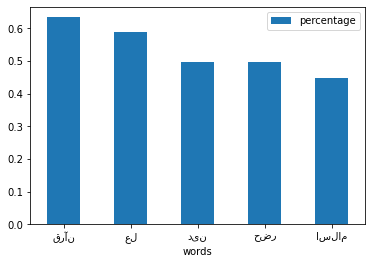

کلیات اسلام


داستان کودک و نوجوانان


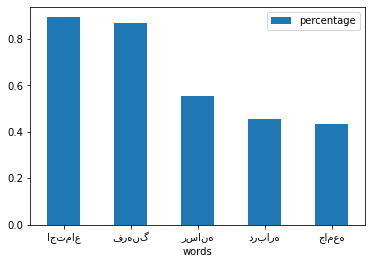

جامعه‌شناسی


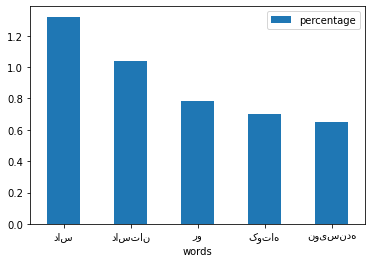

داستان کوتاه


In [24]:
printMostFreqWords(featuresCount)

In [25]:
printWrongChoices(classificationResults)

categories my_categories
34   مدیریت و کسب و کار   جامعه‌شناسی
51   مدیریت و کسب و کار   جامعه‌شناسی
131  مدیریت و کسب و کار   جامعه‌شناسی
188  مدیریت و کسب و کار   جامعه‌شناسی
346  مدیریت و کسب و کار   جامعه‌شناسی
432  مدیریت و کسب و کار   جامعه‌شناسی

categories           my_categories
3         رمان  داستان کودک و نوجوانان
40        رمان  داستان کودک و نوجوانان
55        رمان            داستان کوتاه
60        رمان            داستان کوتاه
76        رمان            داستان کوتاه
90        رمان  داستان کودک و نوجوانان
95        رمان  داستان کودک و نوجوانان
112       رمان  داستان کودک و نوجوانان
117       رمان  داستان کودک و نوجوانان
125       رمان  داستان کودک و نوجوانان
176       رمان            داستان کوتاه
180       رمان  داستان کودک و نوجوانان
192       رمان             کلیات اسلام
197       رمان            داستان کوتاه
208       رمان  داستان کودک و نوجوانان
215       رمان            داستان کوتاه
220       رمان             جامعه‌شناسی
226       رمان  داستان کودک و نوجوانان
287       رمان            داستان کوتاه
294       رمان             کلیات اسلام
299       رمان            داستان کوتاه
309       رمان  داستان کودک و نوجوانان
322       رمان  داستان کودک و نوجوانان
343       رمان  داستان کودک و نوجوانان
347       رمان  داستان کودک و نوجوانان
352       رمان  داستان کودک و نوجوانان
355       رمان      مدیریت و کسب و کار
361       رمان  داستان کودک و نوجوانان
410       رمان  داستان کودک و نوجوانان
415       رمان            داستان کوتاه
423       رمان            داستان کوتاه
431       رمان  داستان کودک و نوجوانان
434       رمان            داستان کوتاه
437       رمان            داستان کوتاه
446       رمان            داستان کوتاه
449       رمان  داستان کودک و نوجوانان

categories           my_categories
5    کلیات اسلام             جامعه‌شناسی
20   کلیات اسلام  داستان کودک و نوجوانان
23   کلیات اسلام             جامعه‌شناسی
151  کلیات اسلام  داستان کودک و نوجوانان
152  کلیات اسلام             جامعه‌شناسی
153  کلیات اسلام             جامعه‌شناسی
201  کلیات اسلام             جامعه‌شناسی
213  کلیات اسلام             جامعه‌شناسی
232  کلیات اسلام            داستان کوتاه
242  کلیات اسلام             جامعه‌شناسی
316  کلیات اسلام             جامعه‌شناسی
382  کلیات اسلام  داستان کودک و نوجوانان
420  کلیات اسلام             جامعه‌شناسی

categories my_categories
121  داستان کودک و نوجوانان   کلیات اسلام
139  داستان کودک و نوجوانان  داستان کوتاه
148  داستان کودک و نوجوانان  داستان کوتاه
160  داستان کودک و نوجوانان          رمان
284  داستان کودک و نوجوانان   کلیات اسلام
372  داستان کودک و نوجوانان   کلیات اسلام

categories           my_categories
8    جامعه‌شناسی      مدیریت و کسب و کار
47   جامعه‌شناسی      مدیریت و کسب و کار
75   جامعه‌شناسی            داستان کوتاه
99   جامعه‌شناسی             کلیات اسلام
200  جامعه‌شناسی      مدیریت و کسب و کار
305  جامعه‌شناسی             کلیات اسلام
363  جامعه‌شناسی  داستان کودک و نوجوانان
421  جامعه‌شناسی      مدیریت و کسب و کار
438  جامعه‌شناسی                    رمان

categories           my_categories
0    داستان کوتاه  داستان کودک و نوجوانان
12   داستان کوتاه  داستان کودک و نوجوانان
41   داستان کوتاه             کلیات اسلام
42   داستان کوتاه  داستان کودک و نوجوانان
67   داستان کوتاه  داستان کودک و نوجوانان
80   داستان کوتاه  داستان کودک و نوجوانان
134  داستان کوتاه  داستان کودک و نوجوانان
150  داستان کوتاه                    رمان
157  داستان کوتاه                    رمان
158  داستان کوتاه                    رمان
171  داستان کوتاه  داستان کودک و نوجوانان
217  داستان کوتاه  داستان کودک و نوجوانان
225  داستان کوتاه             جامعه‌شناسی
238  داستان کوتاه  داستان کودک و نوجوانان
256  داستان کوتاه  داستان کودک و نوجوانان
276  داستان کوتاه                    رمان
297  داستان کوتاه  داستان کودک و نوجوانان
362  داستان کوتاه  داستان کودک و نوجوانان
377  داستان کوتاه  داستان کودک و نوجوانان
378  داستان کوتاه  داستان کودک و نوجوانان
397  داستان کوتاه                    رمان
400  داستان کوتاه  داستان کودک و نوجوانان
402  داستان کوتاه                    رمان
413  داستان کوتاه                    رمان

<p style='text-align : justify; direction: rtl'>
توسط این تابع تمامی مواردی که برنامه ما به اشتباه تشخیص داده است را نمایش دادیم. با بررسی آن ها  مشاهده می شود که در بسیاری از موارد، دسته بندی های اشتباه اعلام شده خیلی به دسته بندی اصلی نزدیک است و در حقیقت مرز این دسته بندی ها برای آن کتاب ها نزدیک یکدیگر بوده و شاید بتوان گفت که در هر دو دسته بندی می توانند قرار بگیرند.
    <br>
    به عنوان مثال بسیاری از رمان ها را داستان کودک و نوجوان و یا داستان کوتاه تشخیص دادیم. همچنین برای مدیریت و کسب و کار و جامعه شناسی که موضوعات  مرتبط تری هستند.
</p>

<h2 style='text-align : justify; direction: rtl'>
Q12:
</h2>
<p style='text-align : justify; direction: rtl'>
در جدول زیر پنج مورد از کتاب هایی که اشتباه تشخیص دادیم را به همراه دلیل آن اورده ایم:
</p>

<table style="width:80%; border: 1px solid black;">
    <tr style = "border: 1px solid black;">
      <th>دلیل</th>
      <th>دسته بندی اصلی</th>
      <th>دسته بندی برنامه</th>
      <th>اسم کتاب</th>
      <th style = "border: 1px solid black;">ایندکس کتاب</th>
    </tr>
    <tr style = "border: 1px solid black;">
      <th>استفاده از کلمات دینی مانند «حضرت» «امام» «علیه السلام» در متن</th>
      <th>رمان</th>
      <th>کلیات اسلام</th>
      <th>مختارنامه</th>
      <th style = "border: 1px solid black;">192</th>
    </tr>
    <tr style = "border: 1px solid black;">
      <th>استفاده از کلمات مرتبط با جامعه شناسی مانند «علم» «نظریه» «واگرایی» در متن</th>
      <th>کلیات اسلام</th>
      <th>جامعه شناسی</th>
      <th>کل‌نگری دینی پیشارشته‌ای</th>
      <th style = "border: 1px solid black;">420</th>
    </tr>
    <tr style = "border: 1px solid black;">
      <th>استفاده از کلمات دینی مانند «معصوم» «امام» «علیه السلام» در متن</th>
      <th>داستان کودک</th>
      <th>کلیات اسلام</th>
      <th>امام هادی علیه‌السلام (مجموعه چهارده معصوم ۱۲)</th>
      <th style = "border: 1px solid black;">284</th>
    </tr>
    <tr style = "border: 1px solid black;">
      <th>استفاده از کلمات دینی مانند «الهی» «قرآن» «انبیاء» در متن</th>
      <th>جامعه شناسی</th>
      <th>کلیات اسلام</th>
      <th>افسانه‌های بیشتر</th>
      <th style = "border: 1px solid black;">305</th>
    </tr>
    <tr style = "border: 1px solid black;">
      <th>استفاده از کلمات مرتبط با جامعه شناسی. برای مثال ۵ بار کلمه «اجتماعی» آورده شده است</th>
      <th>رمان</th>
      <th>جامعه شناسی</th>
      <th>دانشکده‌های من</th>
      <th style = "border: 1px solid black;">220</th>
    </tr>
</table>

<h1 style='text-align : justify; direction: rtl'>
نتیجه گیری:
</h1>
<p style='text-align : justify; direction: rtl'>
بنابراین با مسايل classification آشنا شدیم و دیدیم که چطور با استفاده از naive bayes می شود classify کرد و با اینکه فرض آن دقت را پایین می آورد، اما نتایج قابل قبولی را در برخی مسائل می تواند ارائه دهد.
    <br>
    توسط additive smoothing رفتار برنامه را در موارد خاصی که اتفاق می افتاد تعدیل کردیم تا نتایج بهتری بگیریم.
    همچنین با روش های مختلف محاسبه عملکرد برنامه اعم از precision، recall, f1 و accuracy آشنا شدیم و نقاط قوت و ضعف آن ها را بررسی کردیم. همچنین با روش های متفاوت میانگین گیری و مزیت های هر کدام نسبت به مسئله هم آشنایی های مقدماتی ای کسب کردیم.
    
</p>